<a href="https://colab.research.google.com/github/mehtivakili/ARAS-Vision/blob/main/YOLO11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=1f42e7502f4c89e7e065821ef81b9bc032d856e542f2f0c3f061052112a8ae74
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import os

# Function to extract frames from video
def extract_frames(video_path, output_dir="/content/frames"):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    vidcap = cv2.VideoCapture(video_path)
    success, image = vidcap.read()
    count = 0
    while success:
        if count % 10 == 0:  # Extract every 10th frame to save time
            cv2.imwrite(f"{output_dir}/frame{count}.jpg", image)
        success, image = vidcap.read()
        count += 1
    vidcap.release()
    print(f"Extracted {count} frames")

# Specify your video path in Google Drive
video_path = "/content/drive/MyDrive/DeepFace_Images/Demo3.mp4"
extract_frames(video_path)

Extracted 0 frames


In [ ]:
from deepface import DeepFace
import glob

# Paths to reference images and extracted frames
staff_images = glob.glob("/content/drive/MyDrive/DeepFace_Images/person*.jpg")
frame_images = glob.glob("/content/frames/*.jpg")

# Dictionary to store results
detected_staff = {}

# Loop through each frame
for frame in frame_images:
    for staff_img in staff_images:
        try:
            # Verify if the face in the frame matches the staff image
            result = DeepFace.verify(img1_path=frame, img2_path=staff_img, model_name="VGG-Face", distance_metric="cosine")
            if result["verified"]:
                staff_name = os.path.basename(staff_img).split(".")[0]  # Extract staff name from filename
                detected_staff[frame] = staff_name
                print(f"Match found: {staff_name} in {frame}")
                break  # Move to next frame once a match is found
        except Exception as e:
            print(f"Error processing {frame} with {staff_img}: {e}")

# Print all detected staff
print("Detected staff in video:", list(set(detected_staff.values())))  # Unique staff names

25-03-22 04:30:55 - Directory /root/.deepface has been created
25-03-22 04:30:55 - Directory /root/.deepface/weights has been created
Detected staff in video: []


In [ ]:
import cv2
from deepface import DeepFace
import glob
import os

# Specify your video path and reference images in Google Drive
video_path = "/content/drive/MyDrive/DeepFace_Images/Demo3.mp4"
staff_images = glob.glob("/content/drive/MyDrive/DeepFace_Images/person*.jpg")

# Dictionary to store results
detected_staff = {}

# Open the video and process frames in memory
vidcap = cv2.VideoCapture(video_path)
success, image = vidcap.read()
count = 0

print("Processing video frame-by-frame...")
while success:
    if count % 10 == 0:  # Process every 10th frame to save time
        for staff_img in staff_images:
            try:
                # Verify if the face in the frame matches the staff image
                # Pass the image array directly instead of saving to disk
                result = DeepFace.verify(img1_path=image, img2_path=staff_img,
                                        model_name="VGG-Face", distance_metric="cosine",
                                        enforce_detection=False)  # Avoid crashing if no face is detected
                if result["verified"]:
                    staff_name = os.path.basename(staff_img).split(".")[0]  # Extract staff name
                    detected_staff[count] = staff_name
                    print(f"Match found: {staff_name} at frame {count}")
                    break  # Move to next frame once a match is found
            except Exception as e:
                print(f"Error processing frame {count} with {staff_img}: {e}")

    success, image = vidcap.read()
    count += 1

# Release the video capture object
vidcap.release()
print(f"Processing complete. Total frames: {count}")
print("Detected staff in video:", list(set(detected_staff.values())))  # Unique staff names

Processing video frame-by-frame...
Processing complete. Total frames: 0
Detected staff in video: []


In [ ]:
# Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

import cv2
import os
from deepface import DeepFace
import glob

# Specify your video path and reference images
video_path = "/content/drive/MyDrive/DeepFace_Images/Demo3.mp4"
staff_images = glob.glob("/content/drive/MyDrive/DeepFace_Images/person*.jpg")

# Check if video file exists
print("Checking video path:", os.path.exists(video_path))
if not os.path.exists(video_path):
    print("Error: Video file not found. Please verify the path.")
    raise FileNotFoundError("Video path invalid")

# Check if reference images exist
print("Found reference images:", staff_images)
if not staff_images:
    print("Error: No reference images found. Check the path or pattern.")
    raise FileNotFoundError("No staff images found")

# Open the video and verify it works
vidcap = cv2.VideoCapture(video_path)
if not vidcap.isOpened():
    print("Error: Could not open video file. It might be corrupted or in an unsupported format.")
    raise ValueError("Video file cannot be opened")
else:
    print("Video opened successfully.")
    frame_count = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Total frames in video according to metadata: {frame_count}")

# Dictionary to store results
detected_staff = {}

# Process frames in memory
success, image = vidcap.read()
count = 0

print("Processing video frame-by-frame...")
while success:
    if count % 10 == 0:  # Process every 10th frame
        for staff_img in staff_images:
            try:
                # Verify face match
                result = DeepFace.verify(img1_path=image, img2_path=staff_img,
                                        model_name="VGG-Face", distance_metric="cosine",
                                        enforce_detection=False)
                if result["verified"]:
                    staff_name = os.path.basename(staff_img).split(".")[0]
                    detected_staff[count] = staff_name
                    print(f"Match found: {staff_name} at frame {count}")
                    break
            except Exception as e:
                print(f"Error processing frame {count} with {staff_img}: {e}")

    success, image = vidcap.read()
    count += 1

# Release the video capture object
vidcap.release()
print(f"Processing complete. Total frames processed: {count}")
print("Detected staff in video:", list(set(detected_staff.values())))

Checking video path: False
Error: Video file not found. Please verify the path.


FileNotFoundError: Video path invalid

In [ ]:
!ls "/content/drive/MyDrive/DeepFace_Images"

demo3.mp4  demo4.mp4  person1.jpg  person2.jpg	person3.jpg  person4.jpg


In [1]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=8dd18f3cbde8f06753988e6e5e37b8de3c150b6765641834bbc430df38cfd331
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
25-03-22 07:40:26 - Directory /root/.deepface has been created
25-03-22 07:40:26 - Directory /root/.deepface/weights has been created


Checking video path: True
Found reference images: ['/content/drive/MyDrive/DeepFace_Images/person2.jpg', '/content/drive/MyDrive/DeepFace_Images/person3.jpg', '/content/drive/MyDrive/DeepFace_Images/person4.jpg', '/content/drive/MyDrive/DeepFace_Images/person1.jpg']
Video opened successfully.
Total frames in video according to metadata: 4811
Processing video frame-by-frame...
25-03-22 05:32:32 - vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:02<00:00, 241MB/s]


KeyboardInterrupt: 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Checking video path: True
Found reference images: ['/content/drive/MyDrive/DeepFace_Images/person2.jpg', '/content/drive/MyDrive/DeepFace_Images/person3.jpg', '/content/drive/MyDrive/DeepFace_Images/person4.jpg', '/content/drive/MyDrive/DeepFace_Images/person1.jpg']
Video opened successfully.
Total frames in video: 4811
Video FPS: 25.140438429179838
Processing first 10 seconds of video frame-by-frame...
Processing complete. Total frames processed: 50
Detected staff in video: []


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

import cv2
import os
from deepface import DeepFace
import glob
import time
from IPython.display import clear_output

# Define the structure for the four persons with check status
persons = {
    "person1": {"check": True, "file": "/content/drive/MyDrive/DeepFace_Images/person1.jpg"},
    # "person2": {"check": True, "file": "/content/drive/MyDrive/DeepFace_Images/person2.jpg"},
    # "person3": {"check": True, "file": "/content/drive/MyDrive/DeepFace_Images/person3.jpg"},
    # "person4": {"check": True, "file": "/content/drive/MyDrive/DeepFace_Images/person4.jpg"}
}

# Filter staff images based on check status
staff_images = [p["file"] for p in persons.values() if p["check"] and os.path.exists(p["file"])]

# Specify your video path
video_path = "/content/drive/MyDrive/DeepFace_Images/demo3.mp4"

# Check if video file exists
print("Checking video path:", os.path.exists(video_path))
if not os.path.exists(video_path):
    print("Error: Video file not found. Please verify the path.")
    !ls "/content/drive/MyDrive/DeepFace_Images/"
    raise FileNotFoundError("Video path invalid")

# Check if reference images exist
print("Checking persons to process:", [name for name, info in persons.items() if info["check"]])
print("Found reference images:", staff_images)
if not staff_images:
    print("Error: No reference images selected or found.")
    raise FileNotFoundError("No staff images found")

# Open the video and verify it works
vidcap = cv2.VideoCapture(video_path)
if not vidcap.isOpened():
    print("Error: Could not open video file.")
    raise ValueError("Video file cannot be opened")
else:
    print("Video opened successfully.")
    frame_count = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = vidcap.get(cv2.CAP_PROP_FPS)
    print(f"Total frames in video: {frame_count}")
    print(f"Video FPS: {fps}")

# Dictionary to store detection results
detected_staff = {}

# Process first 10 seconds at 5 FPS
max_seconds = 10
target_fps = 5  # 5 FPS
max_frames = int(fps * max_seconds)
frame_interval = max(1, int(fps / target_fps))
frames_to_process = range(0, max_frames, frame_interval)
total_frames = len(frames_to_process)

print(f"Processing first {max_seconds} seconds at {target_fps} FPS ({total_frames} frames)...")
start_time = time.time()

for i, frame_num in enumerate(frames_to_process):
    vidcap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
    success, image = vidcap.read()
    if not success:
        print(f"Failed to read frame {frame_num}")
        break

    for staff_img in staff_images:
        try:
            result = DeepFace.verify(img1_path=image, img2_path=staff_img,
                                    model_name="Facenet",
                                    distance_metric="cosine",
                                    enforce_detection=False)
            if result["verified"]:
                staff_name = os.path.basename(staff_img).split(".")[0]
                detected_staff[frame_num] = staff_name
                print(f"Match found: {staff_name} at frame {frame_num} (time: {frame_num/fps:.1f}s)")
                break
        except Exception as e:
            print(f"Error processing frame {frame_num} with {staff_img}: {e}")

    # Calculate and display progress
    percent_complete = (i + 1) / total_frames * 100
    elapsed_time = time.time() - start_time
    clear_output(wait=True)
    print(f"Processing first {max_seconds} seconds at {target_fps} FPS ({total_frames} frames)...")
    print(f"Progress: {percent_complete:.1f}% ({i + 1}/{total_frames} frames)")
    print(f"Elapsed time: {elapsed_time:.1f} seconds")
    if detected_staff:
        print("Current detections:", list(set(detected_staff.values())))

# Release the video capture object
vidcap.release()
end_time = time.time()
total_time = end_time - start_time

# Summarize detections for the four persons
detection_summary = {name: name in detected_staff.values() for name in persons.keys()}

print(f"Processing complete. Total frames processed: {total_frames}")
print(f"Final time taken: {total_time:.1f} seconds")
print("Detection summary:")
for name, detected in detection_summary.items():
    status = "Detected" if detected else "Not detected"
    print(f"  {name}: {status}")
print("Detected staff in video:", list(set(detected_staff.values())))
cpu

Processing first 10 seconds at 5 FPS (51 frames)...
Progress: 100.0% (51/51 frames)
Elapsed time: 310.1 seconds
Processing complete. Total frames processed: 51
Final time taken: 310.2 seconds
Detection summary:
  person1: Not detected
Detected staff in video: []


In [5]:
# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

import cv2
import os
from deepface import DeepFace
import glob
import time
from IPython.display import clear_output

# Define the structure for the four persons with check status
persons = {
    "person1": {"check": True, "file": "/content/drive/MyDrive/DeepFace_Images/person1.jpg"},
    "person2": {"check": True, "file": "/content/drive/MyDrive/DeepFace_Images/person2.jpg"},
    "person3": {"check": True, "file": "/content/drive/MyDrive/DeepFace_Images/person3.jpg"},
    "person4": {"check": True, "file": "/content/drive/MyDrive/DeepFace_Images/person4.jpg"}
}

# Filter staff images based on check status
staff_images = [p["file"] for p in persons.values() if p["check"] and os.path.exists(p["file"])]

# Specify your video path
video_path = "/content/drive/MyDrive/DeepFace_Images/demo3.mp4"

# Check if video file exists
print("Checking video path:", os.path.exists(video_path))
if not os.path.exists(video_path):
    print("Error: Video file not found. Please verify the path.")
    !ls "/content/drive/MyDrive/DeepFace_Images/"
    raise FileNotFoundError("Video path invalid")

# Check if reference images exist
print("Checking persons to process:", [name for name, info in persons.items() if info["check"]])
print("Found reference images:", staff_images)
if not staff_images:
    print("Error: No reference images selected or found.")
    raise FileNotFoundError("No staff images found")

# Open the video and verify it works
vidcap = cv2.VideoCapture(video_path)
if not vidcap.isOpened():
    print("Error: Could not open video file.")
    raise ValueError("Video file cannot be opened")
else:
    print("Video opened successfully.")
    frame_count = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = vidcap.get(cv2.CAP_PROP_FPS)
    print(f"Total frames in video: {frame_count}")
    print(f"Video FPS: {fps}")

# Dictionary to store detection results
detected_staff = {}

# Process first 10 seconds at 5 FPS with downscaled frames
max_seconds = 50
target_fps = 1  # 5 FPS
max_frames = int(fps * max_seconds)
frame_interval = max(1, int(fps / target_fps))
frames_to_process = range(0, max_frames, frame_interval)
total_frames = len(frames_to_process)

# Target resolution (1/4 width and height of 2560 × 1440 = 640 × 360)
target_width, target_height = 640, 360

print(f"Processing first {max_seconds} seconds at {target_fps} FPS ({total_frames} frames) with resolution {target_width}x{target_height}...")
start_time = time.time()

for i, frame_num in enumerate(frames_to_process):
    vidcap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
    success, image = vidcap.read()
    if not success:
        print(f"Failed to read frame {frame_num}")
        break

    # Downscale the frame to 1/8 quality (interpreted as 640 × 360)
    image_downscaled = cv2.resize(image, (target_width, target_height), interpolation=cv2.INTER_AREA)

    for staff_img in staff_images:
        try:
            result = DeepFace.verify(img1_path=image_downscaled, img2_path=staff_img,
                                    model_name="Facenet",
                                    distance_metric="cosine",
                                    enforce_detection=False)
            if result["verified"]:
                staff_name = os.path.basename(staff_img).split(".")[0]
                detected_staff[frame_num] = staff_name
                print(f"Match found: {staff_name} at frame {frame_num} (time: {frame_num/fps:.1f}s)")
                break
        except Exception as e:
            print(f"Error processing frame {frame_num} with {staff_img}: {e}")

    # Calculate and display progress
    percent_complete = (i + 1) / total_frames * 100
    elapsed_time = time.time() - start_time
    clear_output(wait=True)
    print(f"Processing first {max_seconds} seconds at {target_fps} FPS ({total_frames} frames) with resolution {target_width}x{target_height}...")
    print(f"Progress: {percent_complete:.1f}% ({i + 1}/{total_frames} frames)")
    print(f"Elapsed time: {elapsed_time:.1f} seconds")
    if detected_staff:
        print("Current detections:", list(set(detected_staff.values())))

# Release the video capture object
vidcap.release()
end_time = time.time()
total_time = end_time - start_time

# Summarize detections
detection_summary = {name: name in detected_staff.values() for name in persons.keys()}

print(f"Processing complete. Total frames processed: {total_frames}")
print(f"Final time taken: {total_time:.1f} seconds")
print("Detection summary:")
for name, detected in detection_summary.items():
    status = "Detected" if detected else "Not detected"
    print(f"  {name}: {status}")
print("Detected staff in video:", list(set(detected_staff.values())))

Processing first 50 seconds at 1 FPS (51 frames) with resolution 640x360...
Progress: 100.0% (51/51 frames)
Elapsed time: 330.1 seconds
Processing complete. Total frames processed: 51
Final time taken: 330.1 seconds
Detection summary:
  person1: Not detected
  person2: Not detected
  person3: Not detected
  person4: Not detected
Detected staff in video: []


In [2]:
pip install deepface


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.9 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=b8923db4f6701c31fc223975c502e5a99e84e44987b0b85f5330645650d56d08
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

from deepface import DeepFace
import glob
import time
import os

# Define the base directory in Google Drive
base_dir = "/content/drive/MyDrive/DeepFace_Images"

# Specify paths to test images and reference images
test_images = sorted(glob.glob(os.path.join(base_dir, "test[1-9].png")))  # test1.jpg to test9.jpg
reference_images = {
    "person1": os.path.join(base_dir, "person1.jpg"),
    "person2": os.path.join(base_dir, "person2.jpg"),
    "person3": os.path.join(base_dir, "person3.jpg"),
    "person4": os.path.join(base_dir, "person4.jpg")
}

# Verify all files exist
print("Test images found:", test_images)
print("Reference images:", list(reference_images.values()))

missing_files = [path for path in test_images + list(reference_images.values()) if not os.path.exists(path)]
if missing_files:
    print("Error: The following files are missing:", missing_files)
    raise FileNotFoundError("Some files not found")

# Start timing
start_time = time.time()

# Dictionary to store results
results = {}

# Compare each test image against all reference images
for test_img in test_images:
    test_name = os.path.basename(test_img)
    results[test_name] = "No match"  # Default result

    for person_name, ref_img in reference_images.items():
        try:
            result = DeepFace.verify(img1_path=test_img,
                                    img2_path=ref_img,
                                    model_name="VGG-Face",
                                    distance_metric="cosine",
                                    enforce_detection=False)

            if result["verified"]:
                results[test_name] = person_name
                print(f"{test_name} matches {person_name} (Distance: {result['distance']:.4f})")
                break  # Stop once a match is found
        except Exception as e:
            print(f"Error comparing {test_name} with {person_name}: {e}")

# Calculate total time
end_time = time.time()
total_time = end_time - start_time

# Print results summary
print("\nResults Summary:")
for test_img, match in results.items():
    print(f"{test_img}: {match}")
print(f"\nTotal time taken: {total_time:.2f} seconds")

Test images found: ['/content/drive/MyDrive/DeepFace_Images/test1.png', '/content/drive/MyDrive/DeepFace_Images/test2.png', '/content/drive/MyDrive/DeepFace_Images/test3.png', '/content/drive/MyDrive/DeepFace_Images/test4.png', '/content/drive/MyDrive/DeepFace_Images/test5.png', '/content/drive/MyDrive/DeepFace_Images/test6.png', '/content/drive/MyDrive/DeepFace_Images/test7.png', '/content/drive/MyDrive/DeepFace_Images/test8.png', '/content/drive/MyDrive/DeepFace_Images/test9.png']
Reference images: ['/content/drive/MyDrive/DeepFace_Images/person1.jpg', '/content/drive/MyDrive/DeepFace_Images/person2.jpg', '/content/drive/MyDrive/DeepFace_Images/person3.jpg', '/content/drive/MyDrive/DeepFace_Images/person4.jpg']
25-03-22 15:12:02 - vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:02<00:00, 240MB/s]



Results Summary:
test1.png: No match
test2.png: No match
test3.png: No match
test4.png: No match
test5.png: No match
test6.png: No match
test7.png: No match
test8.png: No match
test9.png: No match

Total time taken: 73.96 seconds


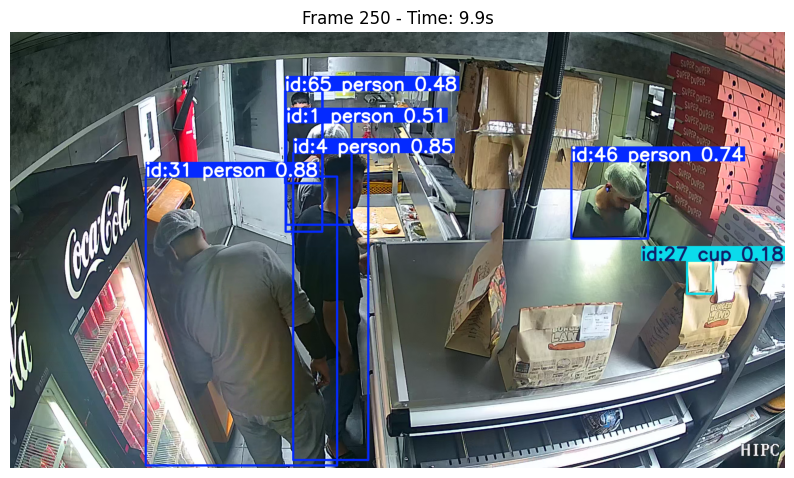

Progress: 100.0% (251/251 frames)
Elapsed time: 229.4 seconds
Processing complete. Total time: 229.43 seconds


In [4]:
# Install required libraries
# !pip install ultralytics

# Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

import cv2
import os
from ultralytics import YOLO
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

# Define paths
base_dir = "/content/drive/MyDrive/DeepFace_Images"
video_path = os.path.join(base_dir, "demo3.mp4")

# Load YOLOv11 model (nano version for speed)
model = YOLO("yolo11n.pt")  # Downloads weights on first run

# Verify video file exists
if not os.path.exists(video_path):
    print("Error: Video file not found.")
    !ls "/content/drive/MyDrive/DeepFace_Images/"
    raise FileNotFoundError("Video path invalid")

# Open video
vidcap = cv2.VideoCapture(video_path)
if not vidcap.isOpened():
    print("Error: Could not open video.")
    raise ValueError("Video file cannot be opened")

# Get video properties
fps = vidcap.get(cv2.CAP_PROP_FPS)
total_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Video FPS: {fps}")
print(f"Total frames: {total_frames}")

# Limit to first 10 seconds (adjustable)
max_seconds = 10
max_frames = int(fps * max_seconds)

# Process video with real-time display
frame_count = 0
start_time = time.time()

plt.ion()  # Interactive mode for real-time updates

while vidcap.isOpened() and frame_count < max_frames:
    ret, frame = vidcap.read()
    if not ret:
        break

    # Perform detection and tracking
    results = model.track(frame, persist=True)  # ByteTrack for ID assignment

    # Annotate frame with boxes and IDs
    annotated_frame = results[0].plot()  # Draws boxes, labels, and IDs
    annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib

    # Display frame
    clear_output(wait=True)
    plt.figure(figsize=(10, 6))
    plt.imshow(annotated_frame_rgb)
    plt.title(f"Frame {frame_count} - Time: {frame_count/fps:.1f}s")
    plt.axis('off')
    display(plt.gcf())
    plt.close()

    # Progress update
    frame_count += 1
    percent_complete = (frame_count / max_frames) * 100
    elapsed_time = time.time() - start_time
    print(f"Progress: {percent_complete:.1f}% ({frame_count}/{max_frames} frames)")
    print(f"Elapsed time: {elapsed_time:.1f} seconds")

# Release resources
vidcap.release()
total_time = time.time() - start_time
print(f"Processing complete. Total time: {total_time:.2f} seconds")

In [ ]:
# Install required libraries
!pip install ultralytics
!git clone https://github.com/ZQPei/deep_sort_pytorch.git
!pip install -r deep_sort_pytorch/requirements.txt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import cv2
import os
from ultralytics import YOLO
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import numpy as np
import torch

# Import DeepSORT (adjust path after cloning)
import sys
sys.path.append('/content/deep_sort_pytorch')
from deep_sort import DeepSort

# Define paths
base_dir = "/content/drive/MyDrive/DeepFace_Images"
video_path = os.path.join(base_dir, "demo3.mp4")

# Load YOLOv11 model
model = YOLO("yolo11n.pt")

# Initialize DeepSORT
deepsort = DeepSort(
    "deep_sort_pytorch/deep/checkpoint/ckpt.t7",  # Pre-trained feature extractor
    max_dist=0.2,  # Maximum distance for matching
    min_confidence=0.3,  # Minimum detection confidence
    nms_max_overlap=0.5,  # Non-max suppression threshold
    max_iou_distance=0.7,  # Maximum IoU distance for matching
    max_age=70,  # Frames to keep lost tracks (adjustable)
    n_init=3,  # Frames to confirm a track
    nn_budget=100,  # Max feature vectors per track
    use_cuda=torch.cuda.is_available()  # Use GPU if available
)

# Verify video file exists
if not os.path.exists(video_path):
    print("Error: Video file not found.")
    !ls "/content/drive/MyDrive/DeepFace_Images/"
    raise FileNotFoundError("Video path invalid")

# Open video
vidcap = cv2.VideoCapture(video_path)
if not vidcap.isOpened():
    print("Error: Could not open video.")
    raise ValueError("Video file cannot be opened")

# Get video properties
fps = vidcap.get(cv2.CAP_PROP_FPS)
total_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Video FPS: {fps}")
print(f"Total frames: {total_frames}")

# Limit to first 10 seconds
max_seconds = 10
max_frames = int(fps * max_seconds)

# Process video with real-time display
frame_count = 0
start_time = time.time()

plt.ion()

while vidcap.isOpened() and frame_count < max_frames:
    ret, frame = vidcap.read()
    if not ret:
        break

    # YOLOv11 detection
    results = model(frame, conf=0.5)  # Detection only, no tracking

    # Extract detections for DeepSORT
    boxes = results[0].boxes.xyxy.cpu().numpy()  # [x1, y1, x2, y2]
    scores = results[0].boxes.conf.cpu().numpy()
    classes = results[0].boxes.cls.cpu().numpy()

    # Prepare detections for DeepSORT (x1, y1, x2, y2, confidence)
    detections = []
    for box, score, cls in zip(boxes, scores, classes):
        if cls == 0:  # Class 0 is "person" in COCO
            detections.append(np.concatenate([box, [score]]))

    # Update DeepSORT with detections
    if detections:
        detections = np.array(detections)
        tracks = deepsort.update(detections, frame)

        # Draw bounding boxes and IDs
        for track in tracks:
            x1, y1, x2, y2, track_id = track
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            cv2.putText(frame, f"ID: {track_id}", (int(x1), int(y1) - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    else:
        tracks = []

    # Convert to RGB for display
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display frame
    clear_output(wait=True)
    plt.figure(figsize=(10, 6))
    plt.imshow(frame_rgb)
    plt.title(f"Frame {frame_count} - Time: {frame_count/fps:.1f}s")
    plt.axis('off')
    display(plt.gcf())
    plt.close()

    # Progress update
    frame_count += 1
    percent_complete = (frame_count / max_frames) * 100
    elapsed_time = time.time() - start_time
    print(f"Progress: {percent_complete:.1f}% ({frame_count}/{max_frames} frames)")
    print(f"Elapsed time: {elapsed_time:.1f} seconds")

# Release resources
vidcap.release()
total_time = time.time() - start_time
print(f"Processing complete. Total time: {total_time:.2f} seconds")

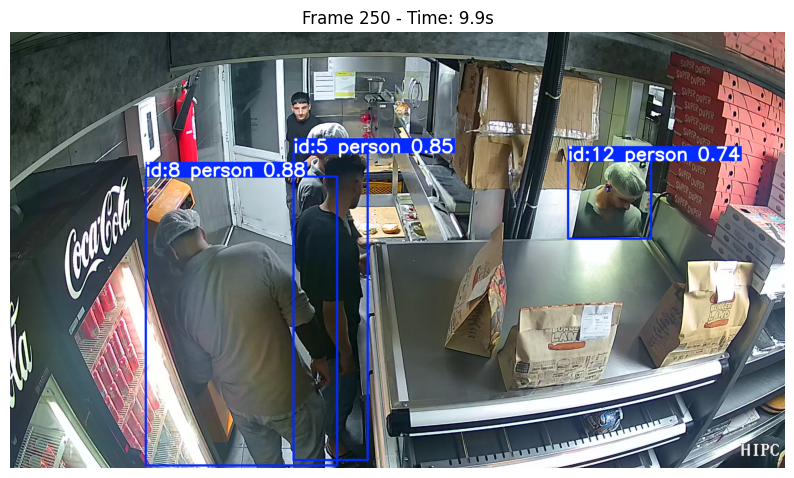

Progress: 100.0% (251/251 frames)
Elapsed time: 198.2 seconds
Processing complete. Total time: 198.22 seconds


In [6]:
# Install required libraries
# !pip install ultralytics

# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

import cv2
import os
from ultralytics import YOLO
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

# Define paths
base_dir = "/content/drive/MyDrive/DeepFace_Images"
video_path = os.path.join(base_dir, "demo3.mp4")

# Load YOLOv11 model (nano version for speed)
model = YOLO("yolo11n.pt")  # Downloads weights on first run

# Verify video file exists
if not os.path.exists(video_path):
    print("Error: Video file not found.")
    !ls "/content/drive/MyDrive/DeepFace_Images/"
    raise FileNotFoundError("Video path invalid")

# Open video
vidcap = cv2.VideoCapture(video_path)
if not vidcap.isOpened():
    print("Error: Could not open video.")
    raise ValueError("Video file cannot be opened")

# Get video properties
fps = vidcap.get(cv2.CAP_PROP_FPS)
total_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Video FPS: {fps}")
print(f"Total frames: {total_frames}")

# Limit to first 10 seconds
max_seconds = 10
max_frames = int(fps * max_seconds)

# Process video with real-time display
frame_count = 0
start_time = time.time()

plt.ion()  # Interactive mode for real-time updates

while vidcap.isOpened() and frame_count < max_frames:
    ret, frame = vidcap.read()
    if not ret:
        break

    # Perform detection and tracking with default ByteTrack
    results = model.track(frame,
                         persist=True,
                         tracker="bytetrack.yaml",  # Use ByteTrack
                         conf=0.5,  # Confidence threshold
                         iou=0.6)   # IoU threshold for tracking

    # Annotate frame with boxes and IDs
    annotated_frame = results[0].plot()  # Draws boxes, labels, and IDs
    annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

    # Display frame
    clear_output(wait=True)
    plt.figure(figsize=(10, 6))
    plt.imshow(annotated_frame_rgb)
    plt.title(f"Frame {frame_count} - Time: {frame_count/fps:.1f}s")
    plt.axis('off')
    display(plt.gcf())
    plt.close()

    # Progress update
    frame_count += 1
    percent_complete = (frame_count / max_frames) * 100
    elapsed_time = time.time() - start_time
    print(f"Progress: {percent_complete:.1f}% ({frame_count}/{max_frames} frames)")
    print(f"Elapsed time: {elapsed_time:.1f} seconds")

# Release resources
vidcap.release()
total_time = time.time() - start_time
print(f"Processing complete. Total time: {total_time:.2f} seconds")

In [7]:
# Install required libraries
!pip install ultralytics
!git clone https://github.com/ZQPei/deep_sort_pytorch.git
!pip install -r deep_sort_pytorch/requirements.txt

Cloning into 'deep_sort_pytorch'...
remote: Enumerating objects: 1078, done.
remote: Counting objects: 100% (352/352), done.
remote: Compressing objects: 100% (258/258), done.
remote: Total 1078 (delta 155), reused 261 (delta 90), pack-reused 726 (from 1)
Receiving objects: 100% (1078/1078), 29.15 MiB | 27.29 MiB/s, done.
Resolving deltas: 100% (506/506), done.
ERROR: Invalid requirement: 'torch~=1.12.1+cu113': Local version label can only be used with `==` or `!=` operators
    torch~=1.12.1+cu113
         ~~~~~~~~^ (from line 37 of deep_sort_pytorch/requirements.txt)


In [8]:


# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import cv2
import os
from ultralytics import YOLO
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import numpy as np
import torch

# Import DeepSORT (adjust path after cloning)
import sys
sys.path.append('/content/deep_sort_pytorch')
from deep_sort import DeepSort

# Define paths
base_dir = "/content/drive/MyDrive/DeepFace_Images"
video_path = os.path.join(base_dir, "demo3.mp4")

# Load YOLOv11 model
model = YOLO("yolo11n.pt")

# Initialize DeepSORT
deepsort = DeepSort(
    "deep_sort_pytorch/deep/checkpoint/ckpt.t7",  # Pre-trained feature extractor
    max_dist=0.2,  # Maximum distance for matching
    min_confidence=0.3,  # Minimum detection confidence
    nms_max_overlap=0.5,  # Non-max suppression threshold
    max_iou_distance=0.7,  # Maximum IoU distance for matching
    max_age=70,  # Frames to keep lost tracks (adjustable)
    n_init=3,  # Frames to confirm a track
    nn_budget=100,  # Max feature vectors per track
    use_cuda=torch.cuda.is_available()  # Use GPU if available
)

# Verify video file exists
if not os.path.exists(video_path):
    print("Error: Video file not found.")
    !ls "/content/drive/MyDrive/DeepFace_Images/"
    raise FileNotFoundError("Video path invalid")

# Open video
vidcap = cv2.VideoCapture(video_path)
if not vidcap.isOpened():
    print("Error: Could not open video.")
    raise ValueError("Video file cannot be opened")

# Get video properties
fps = vidcap.get(cv2.CAP_PROP_FPS)
total_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Video FPS: {fps}")
print(f"Total frames: {total_frames}")

# Limit to first 10 seconds
max_seconds = 10
max_frames = int(fps * max_seconds)

# Process video with real-time display
frame_count = 0
start_time = time.time()

plt.ion()

while vidcap.isOpened() and frame_count < max_frames:
    ret, frame = vidcap.read()
    if not ret:
        break

    # YOLOv11 detection
    results = model(frame, conf=0.5)  # Detection only, no tracking

    # Extract detections for DeepSORT
    boxes = results[0].boxes.xyxy.cpu().numpy()  # [x1, y1, x2, y2]
    scores = results[0].boxes.conf.cpu().numpy()
    classes = results[0].boxes.cls.cpu().numpy()

    # Prepare detections for DeepSORT (x1, y1, x2, y2, confidence)
    detections = []
    for box, score, cls in zip(boxes, scores, classes):
        if cls == 0:  # Class 0 is "person" in COCO
            detections.append(np.concatenate([box, [score]]))

    # Update DeepSORT with detections
    if detections:
        detections = np.array(detections)
        tracks = deepsort.update(detections, frame)

        # Draw bounding boxes and IDs
        for track in tracks:
            x1, y1, x2, y2, track_id = track
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            cv2.putText(frame, f"ID: {track_id}", (int(x1), int(y1) - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    else:
        tracks = []

    # Convert to RGB for display
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display frame
    clear_output(wait=True)
    plt.figure(figsize=(10, 6))
    plt.imshow(frame_rgb)
    plt.title(f"Frame {frame_count} - Time: {frame_count/fps:.1f}s")
    plt.axis('off')
    display(plt.gcf())
    plt.close()

    # Progress update
    frame_count += 1
    percent_complete = (frame_count / max_frames) * 100
    elapsed_time = time.time() - start_time
    print(f"Progress: {percent_complete:.1f}% ({frame_count}/{max_frames} frames)")
    print(f"Elapsed time: {elapsed_time:.1f} seconds")

# Release resources
vidcap.release()
total_time = time.time() - start_time
print(f"Processing complete. Total time: {total_time:.2f} seconds")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: 'deep_sort_pytorch/deep/checkpoint/ckpt.t7'